In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc

In [2]:
df = pd.read_csv('C:/Users/Dell/Desktop/timesData.csv')

In [3]:
df = df.query('year==2016')

In [4]:
df.isnull().sum()

world_rank                 0
university_name            0
country                    0
teaching                   0
international              0
research                   0
citations                  0
income                     0
total_score                0
num_students               7
student_staff_ratio        7
international_students    10
female_male_ratio         61
year                       0
dtype: int64

In [5]:
#dropping missing values
df.dropna(subset=['num_students', 'student_staff_ratio', 'international_students', 'female_male_ratio'], inplace=True)

In [6]:
df.isnull().sum()

world_rank                0
university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
year                      0
dtype: int64

In [7]:
#removing hyphens, commas and % symbol from the rows
df=df[~df.income.str.contains("-")]
df['total_score'] = df['total_score'].apply(lambda x: float(x.split()[0].replace('-', '45')))
df['num_students'] = df['num_students'].apply(lambda x: float(x.split()[0].replace(',', '')))
df['international_students'] = df['international_students'].map(lambda x: x.rstrip('%'))
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64,97.6,99.8,97.8,95.2,2243.0,6.9,27,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34,46:54:00,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22,42:58:00,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55,92.8,18812.0,11.8,34,46:54:00,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84,88.6,99.7,95.4,92.0,11074.0,9.0,33,37 : 63,2016


In [8]:
df.fillna(method = 'ffill',inplace=True)
df.drop(["university_name", "year"], axis = 1, inplace = True)

In [9]:
df['world_rank'] = df['world_rank'].apply(lambda x: float(x.split()[0].replace('-', '')))
df['world_rank'] = df['world_rank'].apply(lambda x: float((str(x).replace('201250', '201'))))
df['world_rank'] = df['world_rank'].apply(lambda x: float((str(x).replace('251300', '251'))))
df['world_rank'] = df['world_rank'].apply(lambda x: float((str(x).replace('301351', '301'))))
df['world_rank'] = df['world_rank'].apply(lambda x: float((str(x).replace('351400', '351'))))
df['world_rank'] = df['world_rank'].apply(lambda x: float((str(x).replace('401500', '401'))))
df['world_rank'] = df['world_rank'].apply(lambda x: float((str(x).replace('501600', '501'))))
df['world_rank'] = df['world_rank'].apply(lambda x: float((str(x).replace('601800', '601'))))

In [10]:
#converting ratio (string) to decimal (float)
df = df[~df.female_male_ratio.str.contains("-")]
df['female_male_ratio'] = df['female_male_ratio'].map(lambda x: x.rstrip(':00'))
for x in range(len(df)):
    idx = df.iloc[x].name
    fmr=df['female_male_ratio'].iloc[x]
    if type(fmr)!=float:
        if ":" in fmr:
            str_arr=fmr.split(':')
            dec_value=float(str_arr[0])/float(str_arr[1])
            df.set_value(idx, 'female_male_ratio', dec_value)
df.head()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


,world_rank,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio
1803,1.0,United States of America,95.6,64,97.6,99.8,97.8,95.2,2243.0,6.9,27,0.492537
1804,2.0,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34,0.851852
1805,3.0,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22,0.724138
1806,4.0,United Kingdom,88.2,91.5,96.7,97.0,55,92.8,18812.0,11.8,34,0.851852
1807,5.0,United States of America,89.4,84,88.6,99.7,95.4,92.0,11074.0,9.0,33,0.587302


In [11]:
#df.country

In [12]:
mapping = {'Argentina': 0, 'Australia': 1, 'Austria': 2, 'Belarus': 3, 'Belgium': 4, 'Brazil': 5, 'Canada': 6, 'Chile': 7, 'China': 8, 'Colombia': 9, 'Cyprus': 10, 'Czech Republic': 11, 'Denmark': 12, 'Egypt': 13, 'Estonia': 14, 'Finland': 15, 'France': 16, 'Germany': 17, 'Greece': 18, 'Hong Kong': 19, 'Hungary': 20, 'Iceland': 21, 'India': 22, 'Indonesia': 23, 'Iran': 24, 'Israel': 25, 'Italy': 26, 'Japan': 27, 'Jordan': 28, 'Kenya': 29, 'Latvia': 30, 'Lithuania': 31, 'Luxembourg': 32, 'Macau': 33, 'Malaysia': 34, 'Mexico': 35, 'Morocco': 36, 'Netherlands': 37, 'New Zealand': 38, 'Nigeria': 39, 'Norway': 40, 'Oman': 41, 'Pakistan': 41, 'Poland': 42, 'Portugal': 43, 'Qatar': 44, 'Republic of Ireland': 45, 'Romania': 46, 'Russian Federation': 47, 'Saudi Arabia': 48, 'Serbia': 49, 'Singapore': 50, 'Slovakia': 51, 'Slovenia': 52, 'South Africa': 53, 'South Korea': 54, 'Spain': 55, 'Sweden': 56, 'Switzerland': 57, 'Taiwan': 58, 'Thailand': 59, 'Turkey': 60, 'Uganda': 61, 'Ukraine': 62, 'United Arab Emirates': 63, 'United Kingdom': 64, 'United States of America': 65, 'Lebanon': 66, 'Bangladesh': 67, 'Ghana': 68}
df.replace({'country': mapping})

,world_rank,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio
1803,1.0,65,95.6,64,97.6,99.8,97.8,95.2,2243.0,6.9,27,0.492537
1804,2.0,64,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34,0.851852
1805,3.0,65,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22,0.724138
1806,4.0,64,88.2,91.5,96.7,97.0,55,92.8,18812.0,11.8,34,0.851852
1807,5.0,65,89.4,84,88.6,99.7,95.4,92.0,11074.0,9.0,33,0.587302
1809,7.0,65,85.1,78.5,91.9,99.3,52.1,90.1,7929.0,8.4,27,0.818182
1810,8.0,64,83.3,96,88.5,96.7,53.7,89.1,15060.0,11.7,51,0.587302
1811,9.0,57,77.0,97.9,95.0,91.1,80,88.3,18178.0,14.7,37,0.449275
1812,10.0,65,85.7,65,88.9,99.2,36.6,87.9,14221.0,6.9,21,0.724138
1813,11.0,65,77.6,70,90.4,98.2,100,87.6,15128.0,3.6,23,10


In [13]:
#standardization
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.replace({'country': mapping}))
df_scaled

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.88888889e-02, 3.29268293e-01, 1.64544640e-02],
       [3.31841154e-06, 9.84615385e-01, 8.93815636e-01, ...,
        6.79012346e-02, 4.14634146e-01, 3.19268762e-02],
       [6.63682309e-06, 1.00000000e+00, 9.63827305e-01, ...,
        4.44444444e-02, 2.68292683e-01, 2.64273981e-02],
       ...,
       [1.99104693e-03, 9.23076923e-01, 5.36756126e-02, ...,
        1.73456790e-01, 2.43902439e-02, 1.94671212e-02],
       [1.99104693e-03, 4.15384615e-01, 1.19019837e-01, ...,
        7.09876543e-02, 9.75609756e-02, 1.19912682e-02],
       [1.99104693e-03, 8.92307692e-01, 7.35122520e-02, ...,
        1.23456790e-01, 4.87804878e-02, 2.77299061e-02]])

# PCA

In [14]:
pcamodel = PCA(n_components=10)
pca = pcamodel.fit_transform(df_scaled)

In [15]:
pcamodel.explained_variance_ 

array([0.1863348 , 0.1289953 , 0.07611289, 0.06157295, 0.04128381,
       0.02682465, 0.0228859 , 0.00746522, 0.00415715, 0.00372453])

In [16]:
pcamodel.explained_variance_ratio_

array([0.33048507, 0.22878722, 0.13499451, 0.10920633, 0.07322133,
       0.04757644, 0.04059064, 0.01324039, 0.00737315, 0.00660586])

# Scree Plot

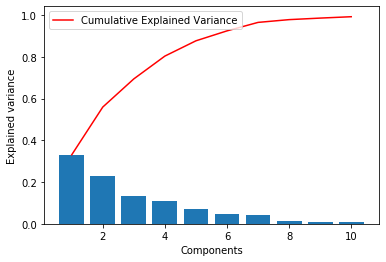

In [17]:
plt.bar(range(1,len(pcamodel.explained_variance_ratio_ )+1),pcamodel.explained_variance_ratio_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ratio_ )+1),
         np.cumsum(pcamodel.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

1. PC1 explains 33%, PC2 explains 23% and PC3 explains 13% of the variance of the dataset.
2. Number of optimal components for this dataset is 7 and the variance of the dataset explained by these components is 94%

In [18]:
#Loading Vectors
print(pcamodel.components_)

[[-1.55941245e-02  2.95424402e-01  3.23501650e-01  3.66192799e-01
   4.11992350e-01  5.15667809e-01  2.49298814e-01  3.78391818e-01
  -1.23714548e-02 -2.24883011e-02  1.78369068e-01 -1.65894282e-02]
 [ 2.68680961e-02 -8.99782785e-01  7.42009166e-02  1.27256799e-01
   1.34455601e-01  4.53138040e-02  3.75877308e-01  5.49531054e-02
   1.17426777e-02  5.25547755e-02  1.92208535e-02 -1.62602519e-02]
 [-2.80709808e-01  2.12238125e-01  1.25313897e-01 -5.33964483e-01
   1.29263874e-01 -2.46600444e-01  6.62641897e-01  8.90925689e-02
   2.49014551e-02 -5.95543026e-03 -2.13261699e-01 -6.81655439e-02]
 [ 9.35828092e-01  9.75693360e-02 -9.56150841e-03 -1.83787162e-01
   2.19480586e-03  9.36719415e-02  2.30683213e-01 -8.58528905e-02
   2.57008800e-03  3.24413776e-02 -9.92342589e-02 -2.37836655e-02]
 [ 4.10367623e-03  2.07306416e-01 -2.74091201e-01  5.64502360e-01
  -2.14200510e-01 -3.27334878e-01  4.90067252e-01 -2.62947273e-01
  -2.98330178e-02  4.06813222e-02  3.05708000e-01 -6.98483236e-02]
 [ 2.

# Biplot

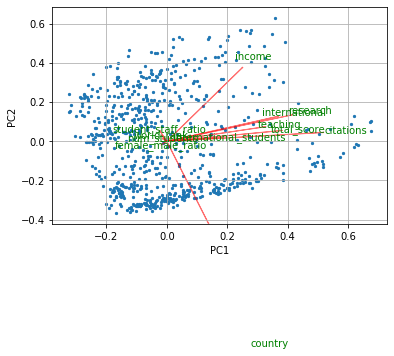

In [19]:
#df_scaled = pd.DataFrame(df_scaled, columns=df_scaled.columns)
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
     
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(df.replace({'country': mapping}).columns))
plt.show()

From the Biplot, we notice the following observations:
1. "World_rank", "num_students", "student_staff_ratio" and "female_male_ratio" features have a negative loading vector along PC1 and "country" and "female_male_ratio" are the features with a negative loading vector along PC2
2. The features "teaching", "international", "research", "total_score", "citations" and "international_students" are close to each other on the biplot and hence are similar in terms of their value distribution and are the significant group of variables along PC1
3. The "country" feature has the highest loading on PC2 while "citations" has the highest loading on PC1

# K-Mean Clustering

In [20]:
df.drop(["world_rank", "total_score"], axis = 1, inplace = True)
df_scaled = normalize(df.replace({'country': mapping}))

Initial random cluster assignment = 3

In [21]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [22]:
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Cluster of each of 702 samples and the cluster center of each feature in the three clusters

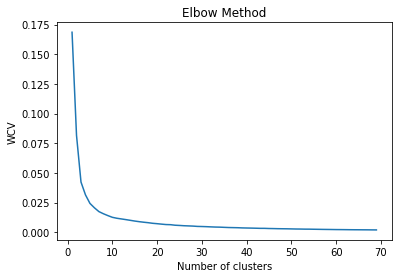

In [23]:
wcv = []
for i in range(1, 70):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcv.append(kmeans.inertia_)
plt.plot(range(1, 70), wcv)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCV')
plt.show()


After perfroming Elbow Rule above, we see that WCV gets constant after a value of 20 clusters. Hence, optimum K for this dataset would be 20. 

# Heirarchical Clustering

In [24]:
df_scaled = normalize(df.replace({'country': mapping}))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,country,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,female_male_ratio
0,0.028844,0.042423,0.028400,0.043310,0.044286,0.043399,0.995333,0.003062,0.011981,0.000219
1,0.003213,0.004342,0.004739,0.004965,0.004960,0.003670,0.999941,0.000582,0.001707,0.000043
2,0.004167,0.005930,0.004892,0.006168,0.006405,0.004058,0.999913,0.000500,0.001410,0.000046
3,0.003402,0.004688,0.004864,0.005140,0.005156,0.002923,0.999939,0.000627,0.001807,0.000045
4,0.005868,0.008071,0.007584,0.007999,0.009001,0.008613,0.999807,0.000813,0.002979,0.000053


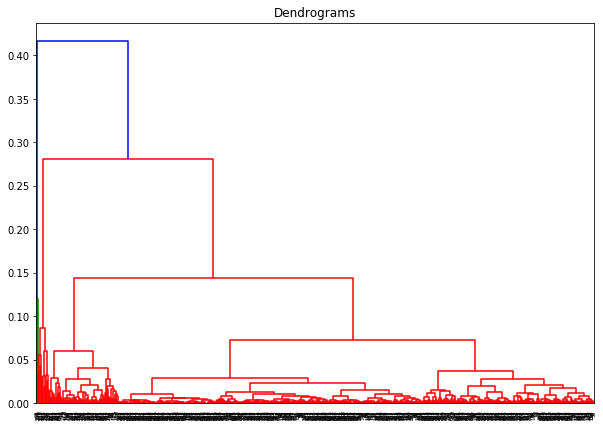

In [25]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))

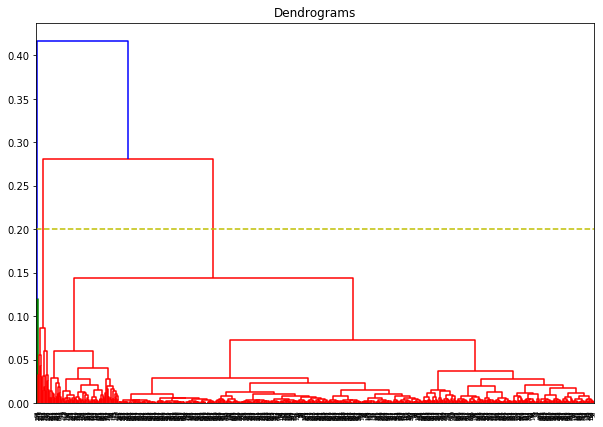

In [26]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=0.20, color='y', linestyle='--')

With cut at 0.2, we get 3 clusters

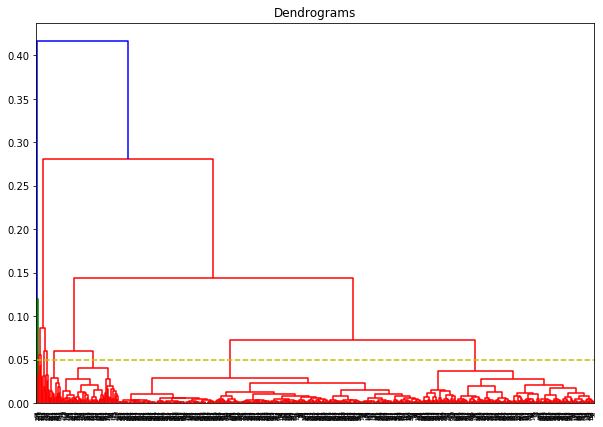

In [27]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=0.05, color='y', linestyle='--')

With cut at 0.05, we get 9 clusters

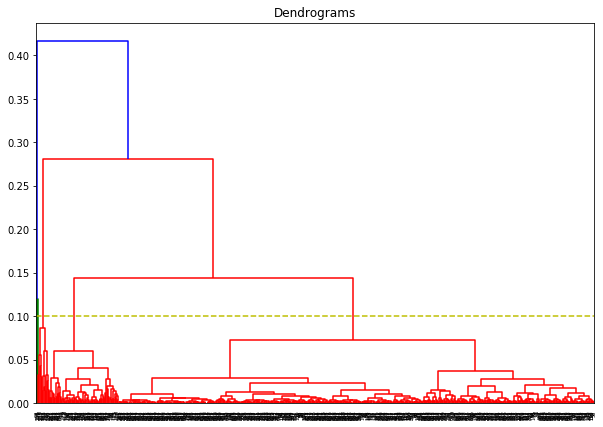

In [28]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=0.10, color='y', linestyle='--')

With cut at 0.1, we get 4 clusters

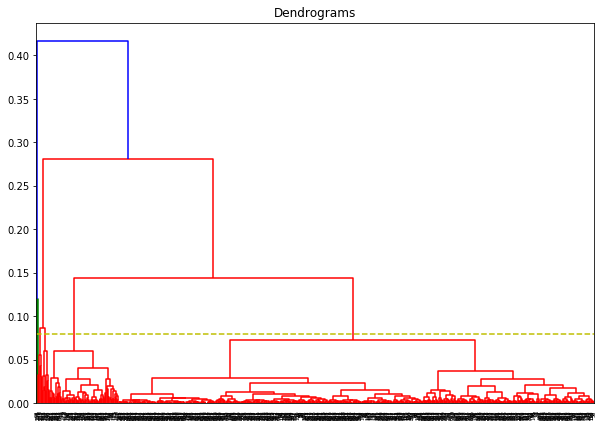

In [29]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=0.08, color='y', linestyle='--')

With a cut at 0.08, we get 5 clusters